# Valuation Techniques

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [19]:
# Define the cryptocurrencies
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download data for the cryptocurrencies
data = yf.download(cryptos, start=start_date, end=end_date)['Adj Close']


[*********************100%%**********************]  10 of 10 completed


## Collect On-Chain Data (e.g., Transaction Volume)


In [20]:
import time

def get_transaction_volume(crypto, start_date, end_date):
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    limit = 2000
    toTs = int(pd.Timestamp(end_date).timestamp())
    volumes = []
    params = {
        'fsym': crypto,
        'tsym': 'USD',
        'limit': limit,
        'toTs': toTs
    }
    api_key = ''  # Replace 'your_api_key_here' with your actual API key
    headers = {'authorization': f'Apikey {api_key}'}
    response = requests.get(url, params=params, headers=headers)
    data = response.json()
    if 'Data' in data and 'Data' in data['Data']:
        df = pd.DataFrame(data['Data']['Data'])
        volumes.append(df)
        toTs = df['time'].iloc[0]
        time.sleep(1)  # Rate limit to avoid hitting API limits
    else:
        raise Exception('Failed to fetch data')
    
    if volumes:
        result = pd.concat(volumes)
        result['time'] = pd.to_datetime(result['time'], unit='s')
        result.set_index('time', inplace=True)
        return result['volumeto']  # or 'volumefrom' based on availability
    else:
        raise Exception('No data available')

# Relative Valuation Models (NVT Ratio)

NVT Ratio = Market Capitalization / Daily Transaction Volume

In [21]:
def calculate_nvt(price_data, volume_data):
    market_cap = price_data * volume_data  # Assuming volume_data is the number of coins in circulation
    nvt_ratio = market_cap / volume_data
    return nvt_ratio

## Absolute Valuation Models (Equation of Exchange)

The Equation of Exchange is given by:

```MV=PQ```

Where:

- M is the total money supply.
- V is the velocity of money.
- P is the price level.
- Q is the transaction volume (or economic output).

For cryptocurrencies:
Intrinsic Value = 𝑃 * 𝑄 / 𝑉

Calculate Intrinsic Value

You need to make some assumptions or gather data for V (velocity), P (price level), and Q (transaction volume).



In [22]:
# Assumptions for Velocity
velocity = {
    'BTC-USD': 5,
    'ETH-USD': 7,
    'SOL-USD': 6,
    'BNB-USD': 8,
    'XRP-USD': 10,
    'TON-USD': 12,
    'DOGE-USD': 15,
    'ADA-USD': 20,
    'SHIB-USD': 25,
    'AVAX-USD': 30,
}

# Calculate Intrinsic Value
def calculate_intrinsic_value(price_data, volume_data, velocity):
    intrinsic_value = (price_data * volume_data) / (velocity or 1)
    return intrinsic_value

## Comparative Analysis

## Other Cryptocurrencies

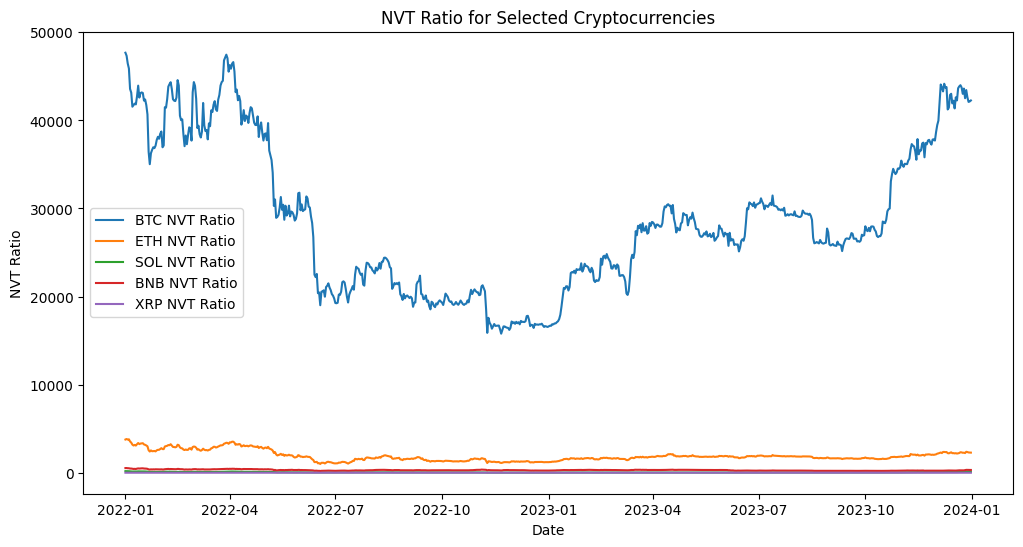

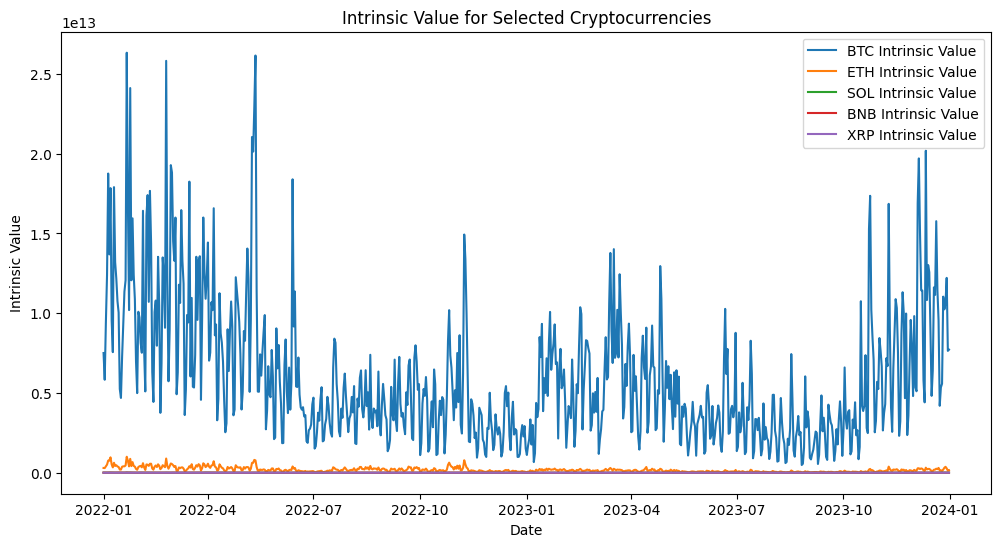

In [23]:
# Repeat for other cryptocurrencies
btc_volume = get_transaction_volume('BTC', start_date, end_date)
eth_volume = get_transaction_volume('ETH', start_date, end_date)
sol_volume = get_transaction_volume('SOL', start_date, end_date)
bnb_volume = get_transaction_volume('BNB', start_date, end_date)
xrp_volume = get_transaction_volume('XRP', start_date, end_date)
# Add similar lines for other cryptocurrencies

# Calculate NVT ratios for all cryptocurrencies
btc_nvt = calculate_nvt(data['BTC-USD'], btc_volume)
eth_nvt = calculate_nvt(data['ETH-USD'], eth_volume)
sol_nvt = calculate_nvt(data['SOL-USD'], sol_volume)
bnb_nvt = calculate_nvt(data['BNB-USD'], bnb_volume)
xrp_nvt = calculate_nvt(data['XRP-USD'], xrp_volume)
# Add similar lines for other cryptocurrencies

# Calculate intrinsic values for all cryptocurrencies
btc_intrinsic_value = calculate_intrinsic_value(data['BTC-USD'], btc_volume, velocity['BTC-USD'])
eth_intrinsic_value = calculate_intrinsic_value(data['ETH-USD'], eth_volume, velocity['ETH-USD'])
sol_intrinsic_value = calculate_intrinsic_value(data['SOL-USD'], sol_volume, velocity['SOL-USD'])
bnb_intrinsic_value = calculate_intrinsic_value(data['BNB-USD'], bnb_volume, velocity['BNB-USD'])
xrp_intrinsic_value = calculate_intrinsic_value(data['XRP-USD'], xrp_volume, velocity['XRP-USD'])
# Add similar lines for other cryptocurrencies

# Plot all NVT ratios together
plt.figure(figsize=(12, 6))
plt.plot(btc_nvt.index, btc_nvt, label='BTC NVT Ratio')
plt.plot(eth_nvt.index, eth_nvt, label='ETH NVT Ratio')
plt.plot(sol_nvt.index, sol_nvt, label='SOL NVT Ratio')
plt.plot(bnb_nvt.index, bnb_nvt, label='BNB NVT Ratio')
plt.plot(xrp_nvt.index, xrp_nvt, label='XRP NVT Ratio')
# Add similar lines for other cryptocurrencies
plt.title('NVT Ratio for Selected Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('NVT Ratio')
plt.legend()
plt.show()

# Plot all intrinsic values together
plt.figure(figsize=(12, 6))
plt.plot(btc_intrinsic_value.index, btc_intrinsic_value, label='BTC Intrinsic Value')
plt.plot(eth_intrinsic_value.index, eth_intrinsic_value, label='ETH Intrinsic Value')
plt.plot(sol_intrinsic_value.index, sol_intrinsic_value, label='SOL Intrinsic Value')
plt.plot(bnb_intrinsic_value.index, bnb_intrinsic_value, label='BNB Intrinsic Value')
plt.plot(xrp_intrinsic_value.index, xrp_intrinsic_value, label='XRP Intrinsic Value')
# Add similar lines for other cryptocurrencies
plt.title('Intrinsic Value for Selected Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Intrinsic Value')
plt.legend()
plt.show()


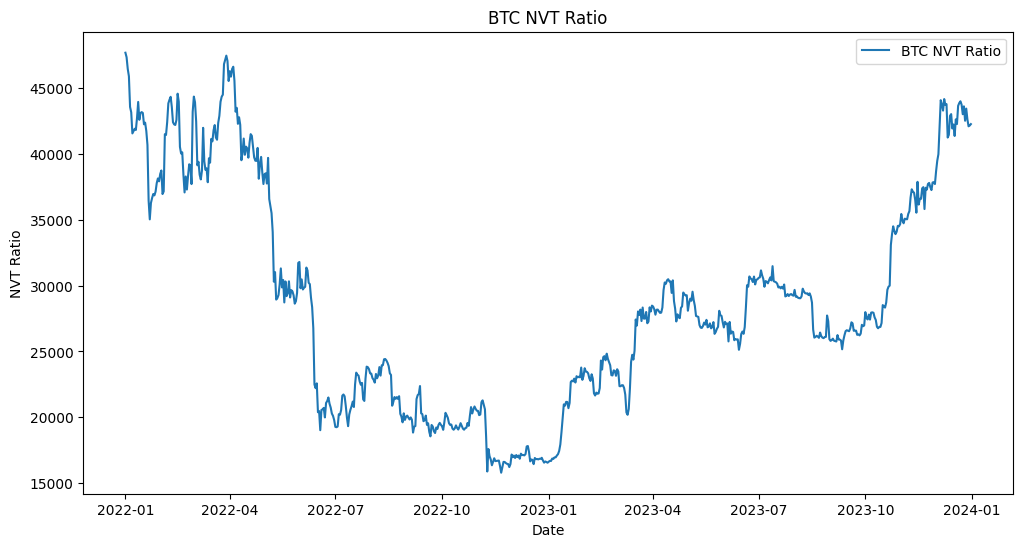

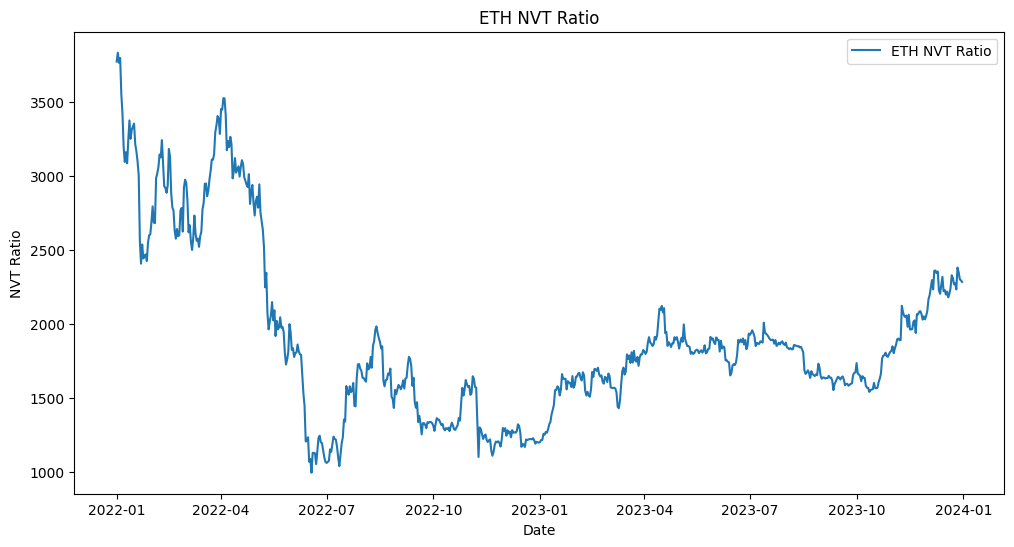

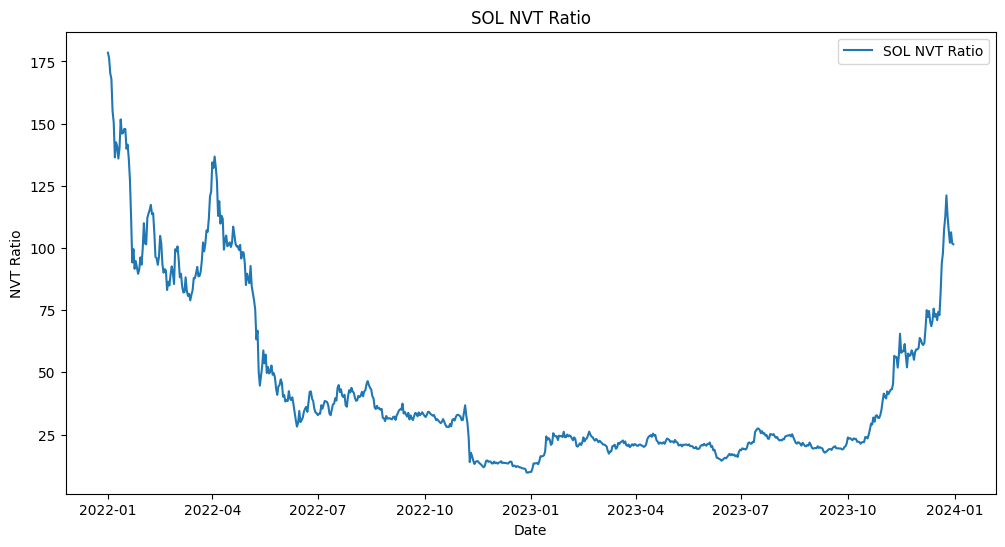

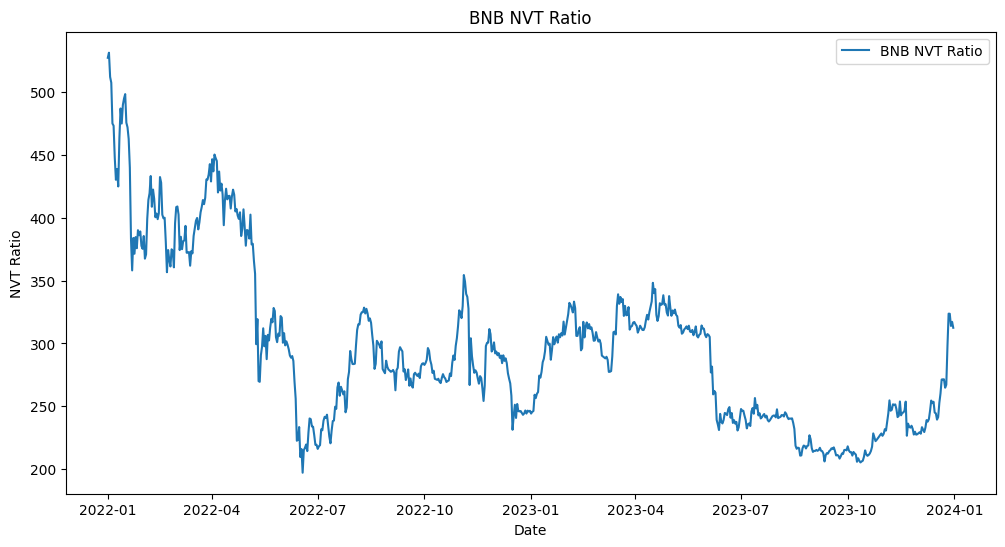

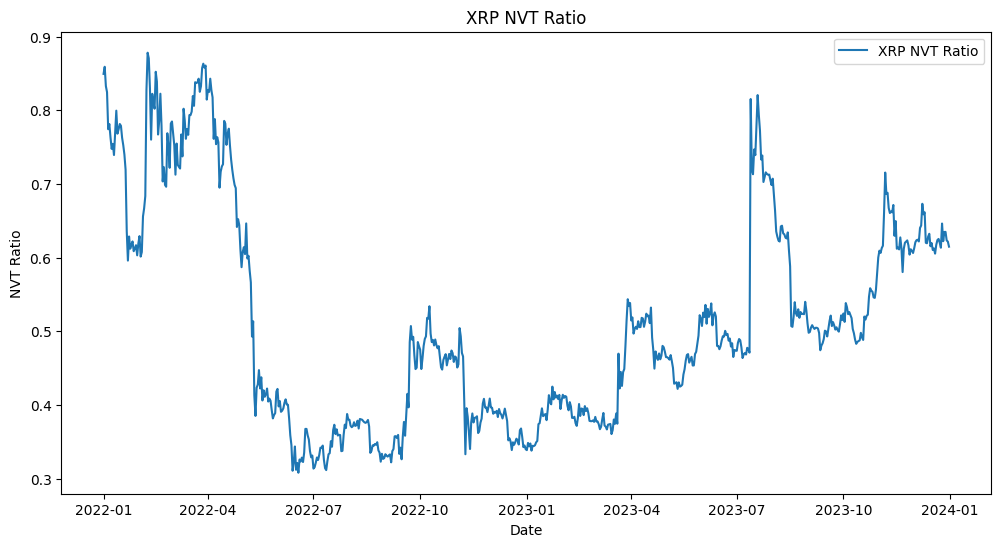

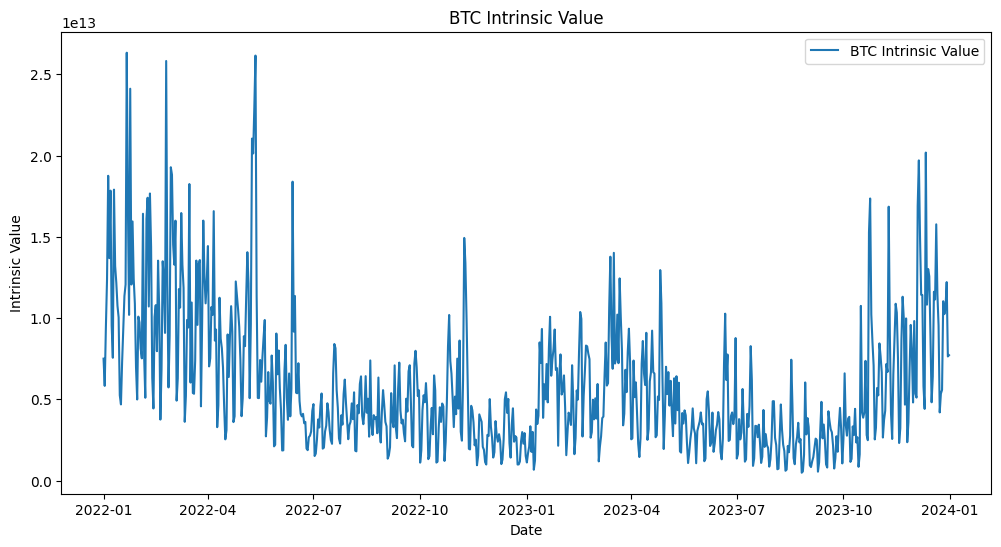

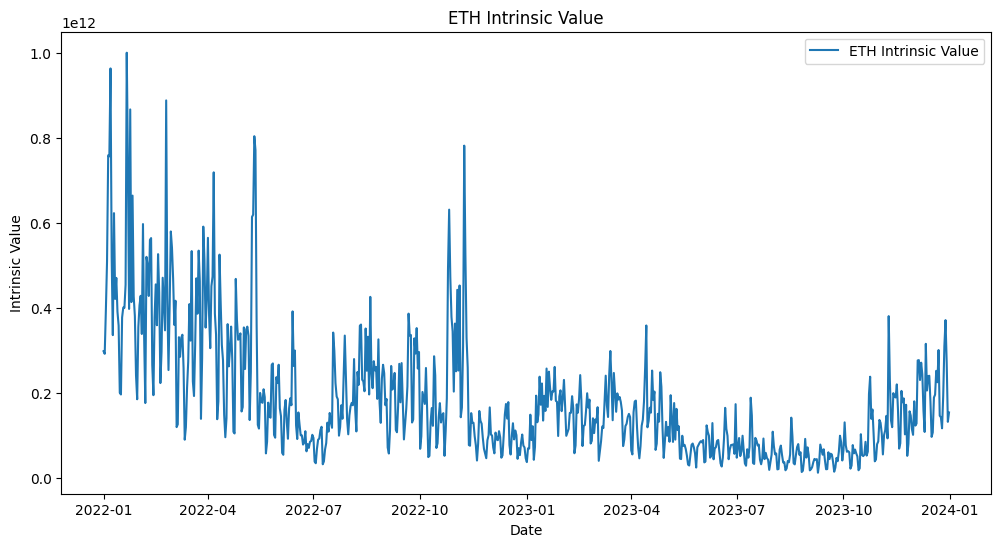

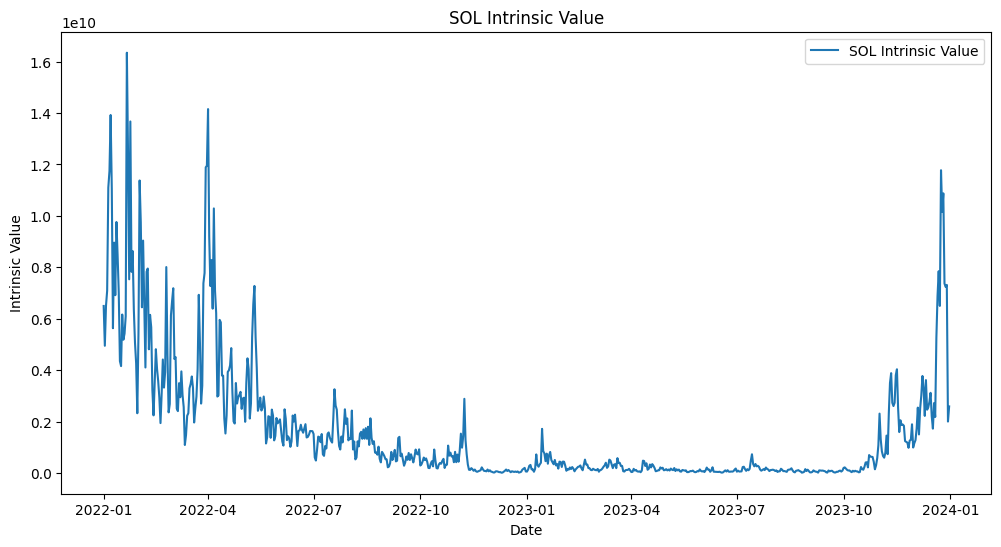

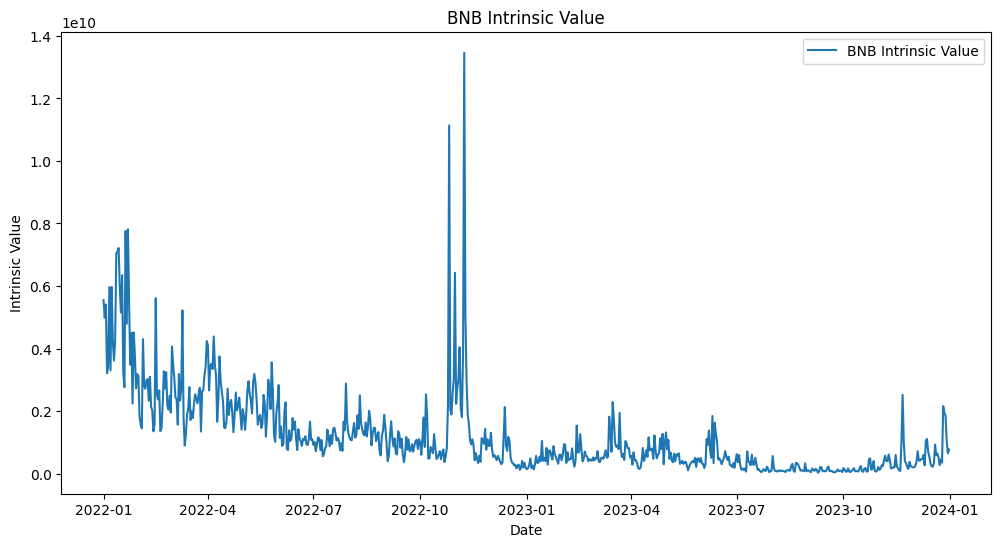

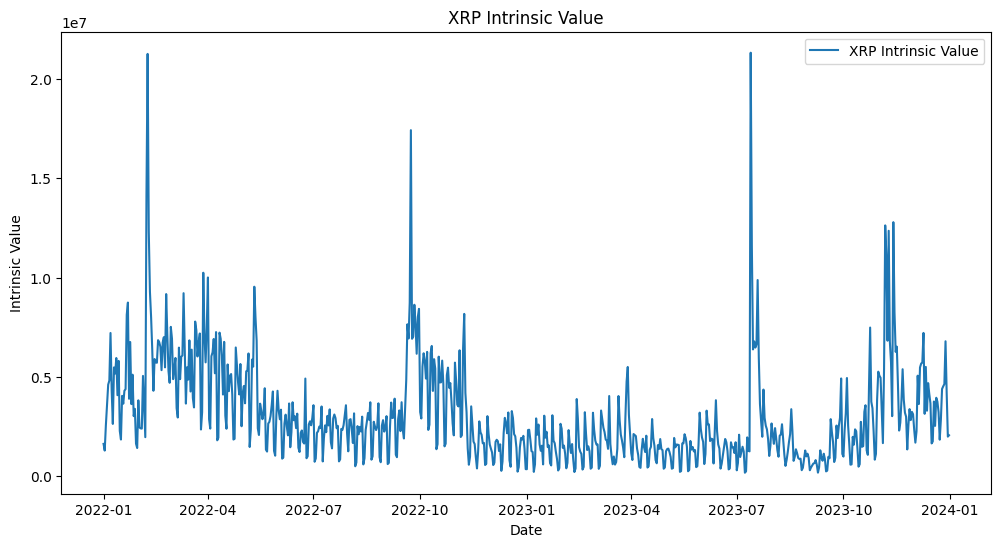

In [24]:
# Plot NVT ratios for each cryptocurrency individually
plt.figure(figsize=(12, 6))
plt.plot(btc_nvt.index, btc_nvt, label='BTC NVT Ratio')
plt.title('BTC NVT Ratio')
plt.xlabel('Date')
plt.ylabel('NVT Ratio')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(eth_nvt.index, eth_nvt, label='ETH NVT Ratio')
plt.title('ETH NVT Ratio')
plt.xlabel('Date')
plt.ylabel('NVT Ratio')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(sol_nvt.index, sol_nvt, label='SOL NVT Ratio')
plt.title('SOL NVT Ratio')
plt.xlabel('Date')
plt.ylabel('NVT Ratio')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(bnb_nvt.index, bnb_nvt, label='BNB NVT Ratio')
plt.title('BNB NVT Ratio')
plt.xlabel('Date')
plt.ylabel('NVT Ratio')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(xrp_nvt.index, xrp_nvt, label='XRP NVT Ratio')
plt.title('XRP NVT Ratio')
plt.xlabel('Date')
plt.ylabel('NVT Ratio')
plt.legend()
plt.show()

# Plot intrinsic values for each cryptocurrency individually
plt.figure(figsize=(12, 6))
plt.plot(btc_intrinsic_value.index, btc_intrinsic_value, label='BTC Intrinsic Value')
plt.title('BTC Intrinsic Value')
plt.xlabel('Date')
plt.ylabel('Intrinsic Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(eth_intrinsic_value.index, eth_intrinsic_value, label='ETH Intrinsic Value')
plt.title('ETH Intrinsic Value')
plt.xlabel('Date')
plt.ylabel('Intrinsic Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(sol_intrinsic_value.index, sol_intrinsic_value, label='SOL Intrinsic Value')
plt.title('SOL Intrinsic Value')
plt.xlabel('Date')
plt.ylabel('Intrinsic Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(bnb_intrinsic_value.index, bnb_intrinsic_value, label='BNB Intrinsic Value')
plt.title('BNB Intrinsic Value')
plt.xlabel('Date')
plt.ylabel('Intrinsic Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(xrp_intrinsic_value.index, xrp_intrinsic_value, label='XRP Intrinsic Value')
plt.title('XRP Intrinsic Value')
plt.xlabel('Date')
plt.ylabel('Intrinsic Value')
plt.legend()
plt.show()
